<a href="https://colab.research.google.com/github/JuanD-Silva/Universidad/blob/main/Aprendizaje%20Supervisado/Taller_2_aprendizaje_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#leer un excel
df = pd.read_excel('/content/2 - intervalos de confianza - altura, peso, fuma, gafas.xlsx')

In [4]:
df.head()

,altura,peso,fuma,gafas
0,180.3,60,1,0
1,161.0,40,0,0
2,170.8,50,1,0
3,176.1,40,0,1
4,167.9,50,0,0


array([[<Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'peso'}>],
       [<Axes: title={'center': 'fuma'}>,
        <Axes: title={'center': 'gafas'}>]], dtype=object)

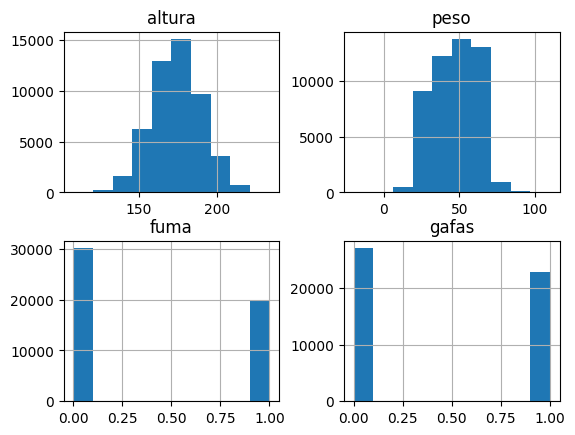

In [5]:
#histograma de cada columna
df.hist(bins=10)

In [6]:
# Media de las columnas altura y peso
media_altura = df['altura'].mean()
media_peso   = df['peso'].mean()

# Proporción (o frecuencia relativa) de las columnas fuma y gafas
prop_fuma  = df['fuma'].mean()   # asumiendo 1 = Sí, 0 = No
prop_gafas = df['gafas'].mean()  # asumiendo 1 = Sí, 0 = No

print(f"Media de altura: {media_altura}")
print(f"Media de peso:   {media_peso}")
print(f"Proporción de fumadores: {prop_fuma}")
print(f"Proporción de uso de gafas: {prop_gafas}")


Media de altura: 174.038152
Media de peso:   47.0314
Proporción de fumadores: 0.39796
Proporción de uso de gafas: 0.45852


# Punto 2

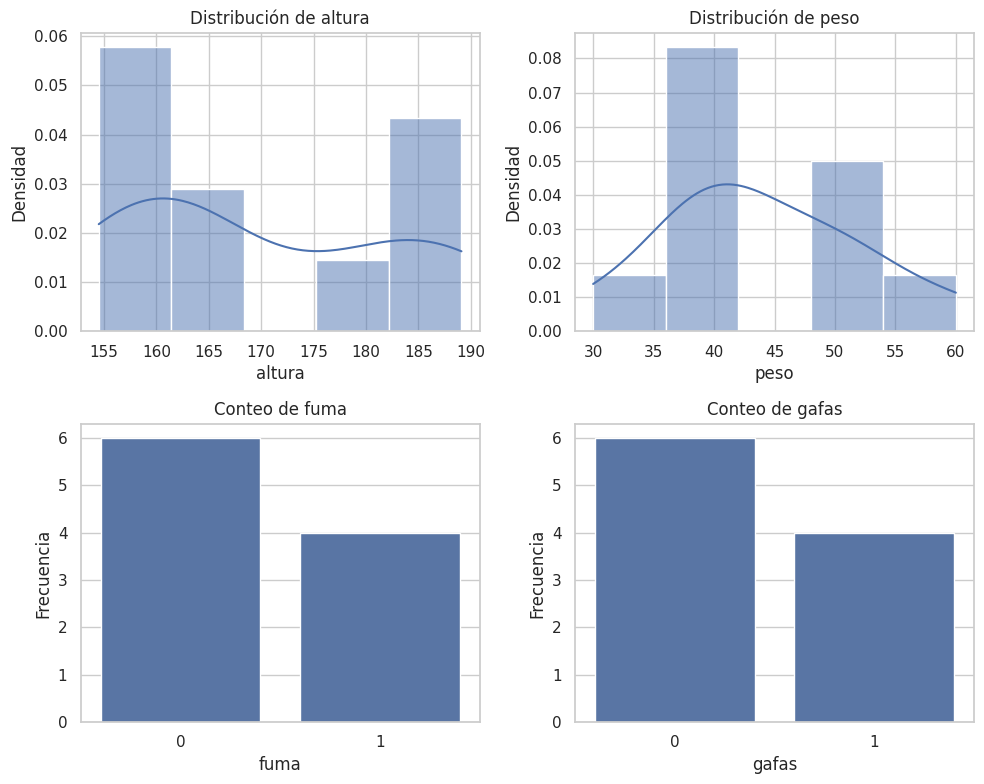

In [9]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Lista de las columnas
cols = df.columns

# Iterar sobre cada columna para muestrear y graficar
for i, col in enumerate(cols):
    # Seleccionamos el eje correspondiente en la cuadricula (2x2)
    ax = axes[i // 2, i % 2]

    # Tomamos una muestra de 10 elementos de la columna
    sample_data = df[col].sample(10, random_state=42)

    if df[col].nunique() > 2:
        # Si la columna es numérica (muchos valores distintos),
        # usamos un histograma con curva KDE para ver su distribución.
        sns.histplot(sample_data, kde=True, stat='density', ax=ax)
        ax.set_title(f"Distribución de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Densidad")
    else:
        # Si la columna es binaria (0/1),
        # hacemos un gráfico de conteo en la muestra
        sns.countplot(x=sample_data, ax=ax)
        ax.set_title(f"Conteo de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Punto 3

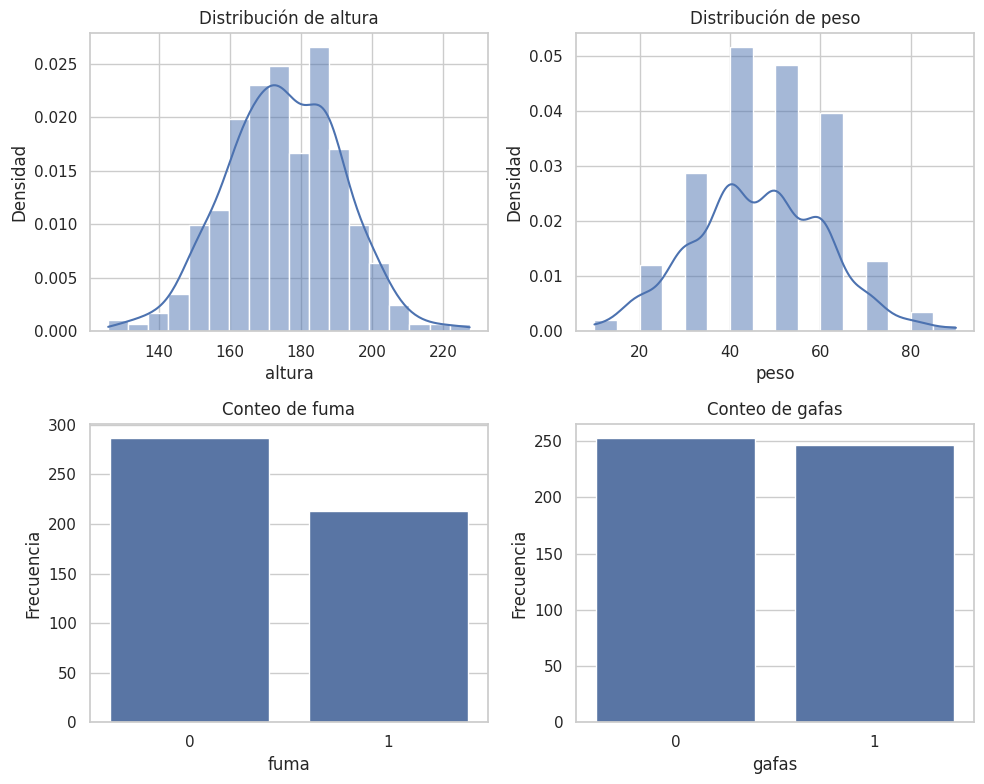

In [10]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Lista de las columnas
cols = df.columns

# Iterar sobre cada columna para muestrear y graficar
for i, col in enumerate(cols):
    # Seleccionamos el eje correspondiente en la cuadricula (2x2)
    ax = axes[i // 2, i % 2]

    # Tomamos una muestra de 10 elementos de la columna
    sample_data = df[col].sample(500, random_state=42)

    if df[col].nunique() > 2:
        # Si la columna es numérica (muchos valores distintos),
        # usamos un histograma con curva KDE para ver su distribución.
        sns.histplot(sample_data, kde=True, stat='density', ax=ax)
        ax.set_title(f"Distribución de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Densidad")
    else:
        # Si la columna es binaria (0/1),
        # hacemos un gráfico de conteo en la muestra
        sns.countplot(x=sample_data, ax=ax)
        ax.set_title(f"Conteo de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Punto 4

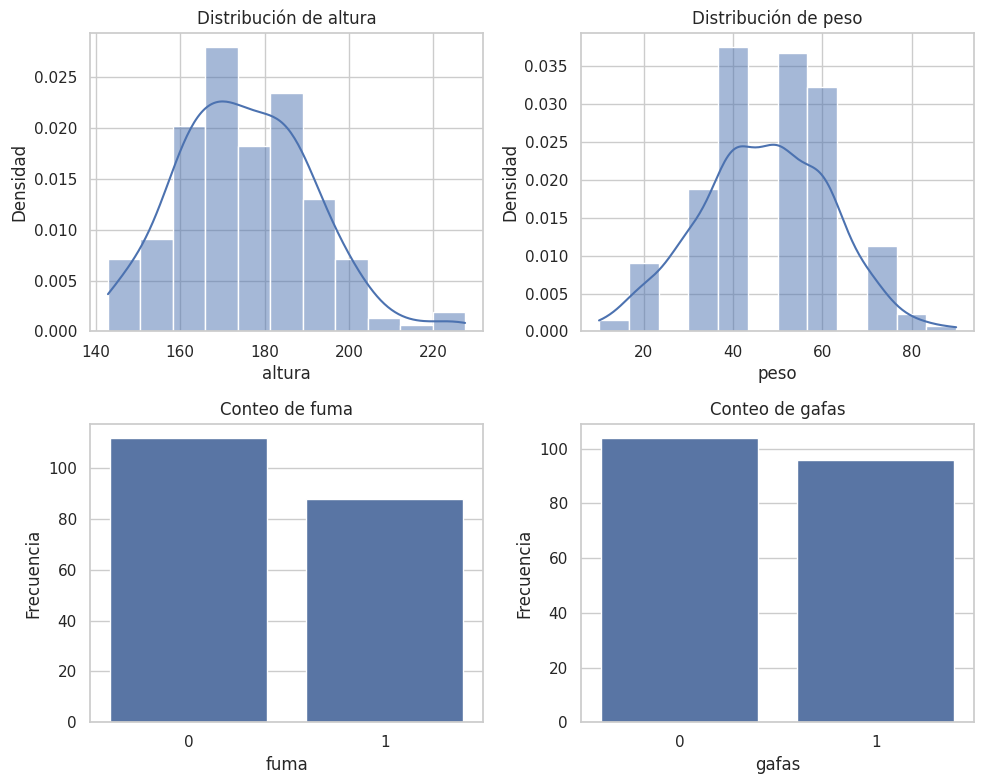

In [11]:
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura con 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Lista de las columnas
cols = df.columns

# Iterar sobre cada columna para muestrear y graficar
for i, col in enumerate(cols):
    # Seleccionamos el eje correspondiente en la cuadricula (2x2)
    ax = axes[i // 2, i % 2]

    # Tomamos una muestra de 10 elementos de la columna
    sample_data = df[col].sample(200, random_state=42)

    if df[col].nunique() > 2:
        # Si la columna es numérica (muchos valores distintos),
        # usamos un histograma con curva KDE para ver su distribución.
        sns.histplot(sample_data, kde=True, stat='density', ax=ax)
        ax.set_title(f"Distribución de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Densidad")
    else:
        # Si la columna es binaria (0/1),
        # hacemos un gráfico de conteo en la muestra
        sns.countplot(x=sample_data, ax=ax)
        ax.set_title(f"Conteo de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Punto 5


In [20]:
N = 1000       # número de muestras que vamos a tomar
n = 10         # tamaño de cada muestra
altura_means = []
peso_means   = []
fuma_means   = []
gafas_means  = []

for _ in range(N):
    # Muestra de tamaño n CON reemplazo, para simular muestreo repetido
    sample_altura = df['altura'].sample(n, replace=True)
    sample_peso   = df['peso'].sample(n, replace=True)
    sample_fuma   = df['fuma'].sample(n, replace=True)
    sample_gafas  = df['gafas'].sample(n, replace=True)

    # Calculamos la media (o proporción) de cada muestra
    altura_means.append(sample_altura.mean())
    peso_means.append(sample_peso.mean())
    fuma_means.append(sample_fuma.mean())     # proporción 1s
    gafas_means.append(sample_gafas.mean())   # proporción 1s


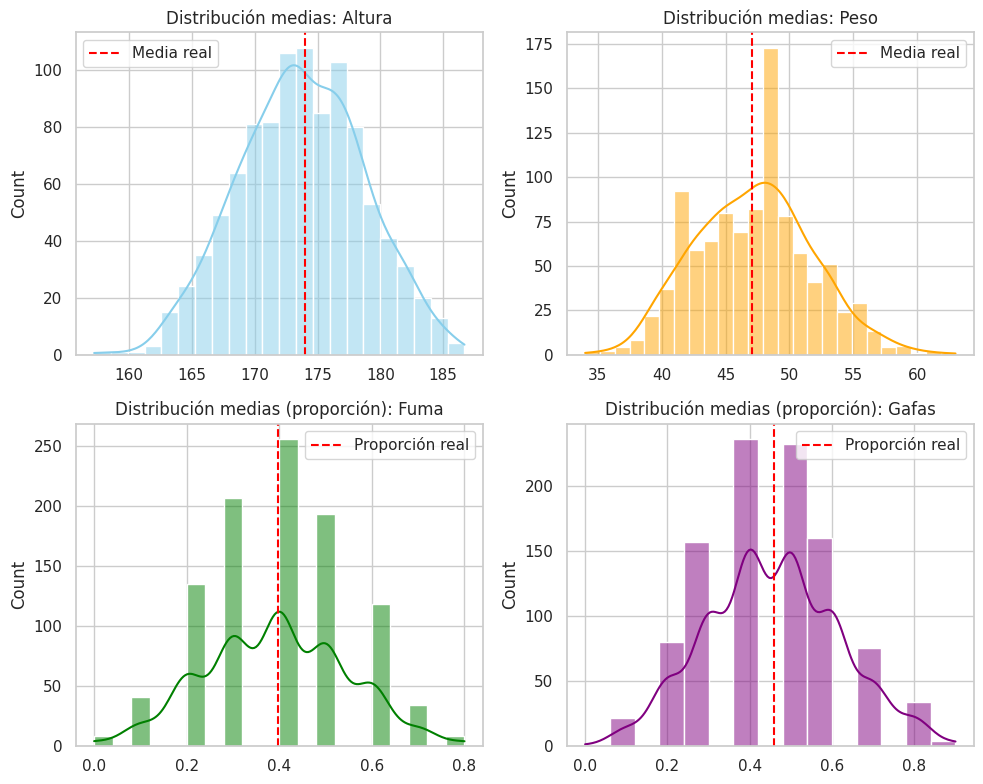

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(altura_means, kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].axvline(media_altura, color='red', linestyle='--', label='Media real')
axes[0,0].set_title('Distribución medias: Altura')
axes[0,0].legend()

sns.histplot(peso_means, kde=True, ax=axes[0,1], color='orange')
axes[0,1].axvline(media_peso, color='red', linestyle='--', label='Media real')
axes[0,1].set_title('Distribución medias: Peso')
axes[0,1].legend()

sns.histplot(fuma_means, kde=True, ax=axes[1,0], color='green')
axes[1,0].axvline(prop_fuma, color='red', linestyle='--', label='Proporción real')
axes[1,0].set_title('Distribución medias (proporción): Fuma')
axes[1,0].legend()

sns.histplot(gafas_means, kde=True, ax=axes[1,1], color='purple')
axes[1,1].axvline(prop_gafas, color='red', linestyle='--', label='Proporción real')
axes[1,1].set_title('Distribución medias (proporción): Gafas')
axes[1,1].legend()

plt.tight_layout()
plt.show()


# Punto 6


Estimadores en la muestra:
 - Media (altura) : 175.22
 - Media (peso)   : 46.67
 - Proporción (fuma) : 0.53
 - Proporción (gafas): 0.57


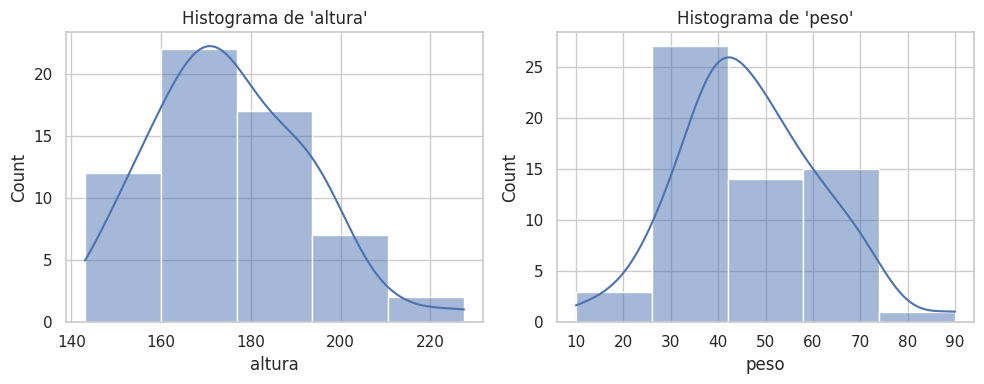

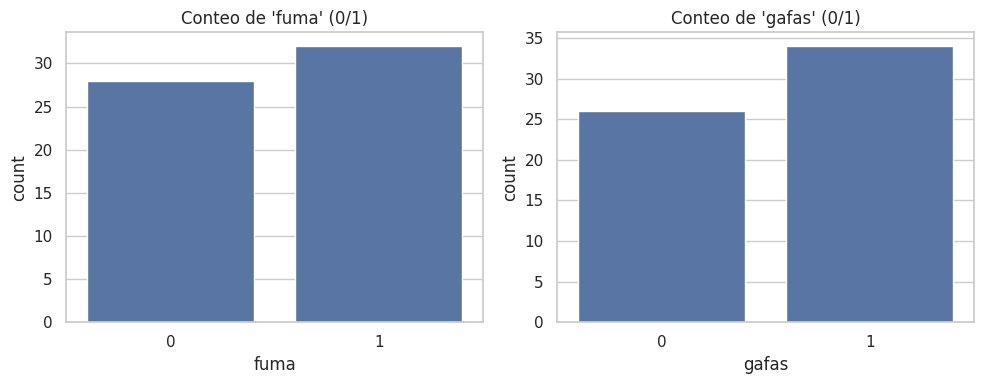

In [24]:
sample_size = 60
muestra = df.sample(n=sample_size, random_state=42)

# 3. Calcula el estimador en la muestra
media_altura_muestra = muestra['altura'].mean()
media_peso_muestra   = muestra['peso'].mean()
prop_fuma_muestra    = muestra['fuma'].mean()
prop_gafas_muestra   = muestra['gafas'].mean()


print("\nEstimadores en la muestra:")
print(f" - Media (altura) : {media_altura_muestra:.2f}")
print(f" - Media (peso)   : {media_peso_muestra:.2f}")
print(f" - Proporción (fuma) : {prop_fuma_muestra:.2f}")
print(f" - Proporción (gafas): {prop_gafas_muestra:.2f}")

# Configuramos el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# --- HISTOGRAMAS PARA COLUMNAS NUMÉRICAS ---
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Histograma de 'altura'
sns.histplot(data=muestra, x='altura', kde=True, bins=5, ax=axs[0])
axs[0].set_title("Histograma de 'altura'")

# Histograma de 'peso'
sns.histplot(data=muestra, x='peso', kde=True, bins=5, ax=axs[1])
axs[1].set_title("Histograma de 'peso'")

plt.tight_layout()
plt.show()

# --- DISTRIBUCIÓN PARA COLUMNAS BINARIAS ---
# Podríamos hacer un histograma de 0 y 1, pero suele resultar más intuitivo un countplot
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Countplot para 'fuma'
sns.countplot(x='fuma', data=muestra, ax=axs[0])
axs[0].set_title("Conteo de 'fuma' (0/1)")

# Countplot para 'gafas'
sns.countplot(x='gafas', data=muestra, ax=axs[1])
axs[1].set_title("Conteo de 'gafas' (0/1)")

plt.tight_layout()
plt.show()


# Punto 7

In [27]:
# Desviación estándar muestral de altura y peso (ddof=1 para muestra)
s_altura = muestra['altura'].std(ddof=1)
s_peso   = muestra['peso'].std(ddof=1)

SE_altura = s_altura / np.sqrt(n)
SE_peso   = s_peso   / np.sqrt(n)

# Para las proporciones:
p_fuma  = prop_fuma_muestra
p_gafas = prop_gafas_muestra

SE_fuma  = np.sqrt(p_fuma * (1 - p_fuma) / n)
SE_gafas = np.sqrt(p_gafas * (1 - p_gafas) / n)

print("\nError estándar de los estimadores en la muestra:")
print(f" - SE(altura) : {SE_altura:.3f}")
print(f" - SE(peso)   : {SE_peso:.3f}")
print(f" - SE(fuma)   : {SE_fuma:.3f}")
print(f" - SE(gafas)  : {SE_gafas:.3f}")


Error estándar de los estimadores en la muestra:
 - SE(altura) : 5.409
 - SE(peso)   : 4.646
 - SE(fuma)   : 0.158
 - SE(gafas)  : 0.157


# Punto 8

In [28]:
# Diccionario con los z para diferentes niveles de confianza
z_values = {
    0.50: 0.6745,  # 50%  (25% cada cola)
    0.80: 1.2816,  # 80%  (10% cada cola)
    0.95: 1.96,    # 95%  (2.5% cada cola)
    0.99: 2.576    # 99%  (0.5% cada cola)
}

def ic(z, est, se):
    """Retorna (li, ls) intervalo de confianza dado z, estimador y error estándar."""
    li = est - z * se
    ls = est + z * se
    return (li, ls)

In [29]:
# Calculamos los intervalos de confianza para cada nivel
for conf in [0.50, 0.80, 0.95, 0.99]:
    z = z_values[conf]
    ic_altura = ic(z, media_altura_muestra, SE_altura)
    ic_peso   = ic(z, media_peso_muestra,   SE_peso)
    ic_fuma   = ic(z, prop_fuma_muestra,    SE_fuma)
    ic_gafas  = ic(z, prop_gafas_muestra,   SE_gafas)

    print(f"\nNivel de confianza: {int(conf*100)}% (z = {z})")
    print(f"IC altura : {ic_altura[0]:.2f} a {ic_altura[1]:.2f}")
    print(f"IC peso   : {ic_peso[0]:.2f} a {ic_peso[1]:.2f}")
    print(f"IC fuma   : {ic_fuma[0]:.2f} a {ic_fuma[1]:.2f}")
    print(f"IC gafas  : {ic_gafas[0]:.2f} a {ic_gafas[1]:.2f}")


Nivel de confianza: 50% (z = 0.6745)
IC altura : 171.57 a 178.87
IC peso   : 43.53 a 49.80
IC fuma   : 0.43 a 0.64
IC gafas  : 0.46 a 0.67

Nivel de confianza: 80% (z = 1.2816)
IC altura : 168.29 a 182.16
IC peso   : 40.71 a 52.62
IC fuma   : 0.33 a 0.74
IC gafas  : 0.37 a 0.77

Nivel de confianza: 95% (z = 1.96)
IC altura : 164.62 a 185.83
IC peso   : 37.56 a 55.77
IC fuma   : 0.22 a 0.84
IC gafas  : 0.26 a 0.87

Nivel de confianza: 99% (z = 2.576)
IC altura : 161.29 a 189.16
IC peso   : 34.70 a 58.63
IC fuma   : 0.13 a 0.94
IC gafas  : 0.16 a 0.97


# Punto 9

In [30]:

# Suponemos los estimadores puntuales de la muestra:
p_fuma  = 0.53  # proporción de fuma
p_gafas = 0.57  # proporción de gafas
n = 50

# Diferencia puntual
p_delta = p_fuma - p_gafas

# Error estándar (suponiendo independencia y n1=n2=n)
SE_delta = np.sqrt( (p_fuma*(1 - p_fuma) + p_gafas*(1 - p_gafas)) / n )

# Diccionario con los z-scores
z_values = {
    0.50: 0.6745,
    0.80: 1.2816,
    0.95: 1.96,
    0.99: 2.576
}

def ic_diff_prop(z, p_diff, se_diff):
    li = p_diff - z * se_diff
    ls = p_diff + z * se_diff
    return (li, ls)

print(f"Diferencia puntual: p_fuma - p_gafas = {p_delta:.3f}")
print(f"Error estándar: {SE_delta:.3f}\n")

for conf in [0.50, 0.80, 0.95, 0.99]:
    z = z_values[conf]
    ic_pdiff = ic_diff_prop(z, p_delta, SE_delta)
    print(f"Nivel de confianza: {int(conf*100)}% (z={z})")
    print(f"IC diferencia: ({ic_pdiff[0]:.3f}, {ic_pdiff[1]:.3f})\n")

Diferencia puntual: p_fuma - p_gafas = -0.040
Error estándar: 0.099

Nivel de confianza: 50% (z=0.6745)
IC diferencia: (-0.107, 0.027)

Nivel de confianza: 80% (z=1.2816)
IC diferencia: (-0.167, 0.087)

Nivel de confianza: 95% (z=1.96)
IC diferencia: (-0.235, 0.155)

Nivel de confianza: 99% (z=2.576)
IC diferencia: (-0.296, 0.216)

